# Felix Round 3 ETF Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List
import numpy as np

In [3]:
trades = []
prices = []
for i in range(0,3):
    trades.append(pd.read_csv(f'../../data2024/island-data-bottle-round-3/trades_round_3_day_{i}_nn.csv', sep=";"))
    prices.append(pd.read_csv(f'../../data2024/island-data-bottle-round-3/prices_round_3_day_{i}.csv', sep=";"))

In [4]:
prices_concat = pd.concat(prices)
prices_concat["mid_price"] = (prices_concat["ask_price_1"] + prices_concat["bid_price_1"]) / 2

In [5]:
DAY = 1
temp_df = prices[DAY]
temp_df["mid_price"] = (temp_df["ask_price_1"] + temp_df["bid_price_1"])/2

In [6]:
temp_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,GIFT_BASKET,71108,12,71107.0,27.0,NaN,NaN,71121,12,71122.0,27.0,NaN,NaN,71114.5,0.0
1,1,0,CHOCOLATE,7987,104,NaN,NaN,NaN,NaN,7989,104,NaN,NaN,NaN,NaN,7988.0,0.0
2,1,0,ROSES,14545,27,14544.0,34.0,NaN,NaN,14546,61,NaN,NaN,NaN,NaN,14545.5,0.0
3,1,0,STRAWBERRIES,4030,237,NaN,NaN,NaN,NaN,4031,237,NaN,NaN,NaN,NaN,4030.5,0.0
4,1,100,STRAWBERRIES,4030,52,4029.0,137.0,NaN,NaN,4031,189,NaN,NaN,NaN,NaN,4030.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,999800,STRAWBERRIES,4035,211,NaN,NaN,NaN,NaN,4036,80,4037.0,131.0,NaN,NaN,4035.5,0.0
39996,1,999900,ROSES,14422,70,NaN,NaN,NaN,NaN,14423,70,NaN,NaN,NaN,NaN,14422.5,0.0
39997,1,999900,STRAWBERRIES,4035,204,NaN,NaN,NaN,NaN,4037,204,NaN,NaN,NaN,NaN,4036.0,0.0
39998,1,999900,GIFT_BASKET,70580,15,70579.0,21.0,NaN,NaN,70593,15,70594.0,21.0,NaN,NaN,70586.5,0.0


1. Four `CHOCOLATE` bars
2. Six `STRAWBERRIES`
3. A single `ROSES`

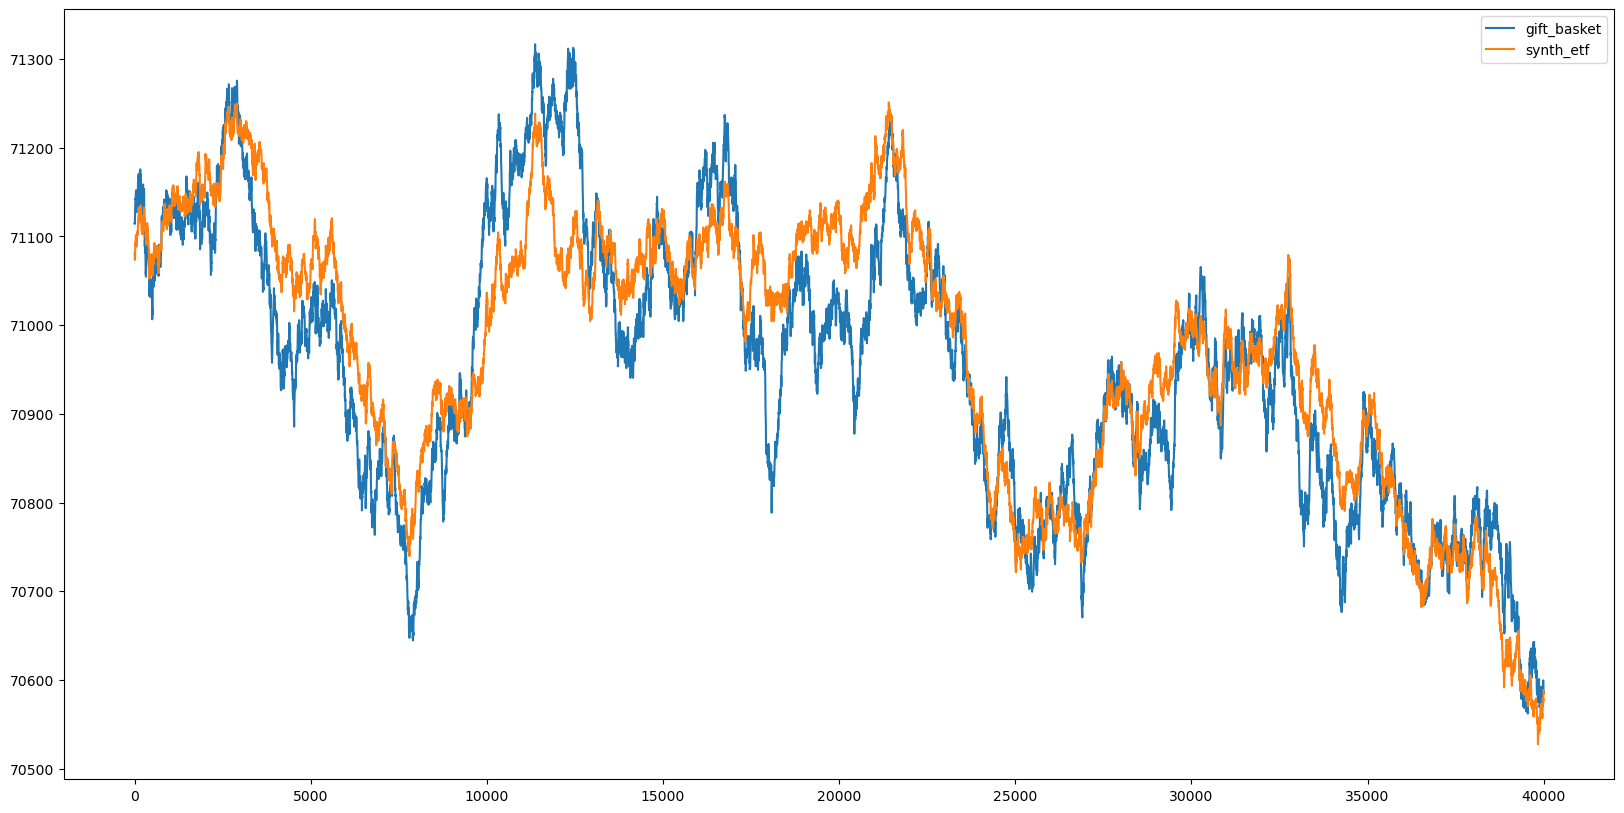

In [7]:
plt.figure(figsize=(20,10))
choco = temp_df[temp_df['product'] == 'CHOCOLATE']
straw = temp_df[temp_df['product'] == 'STRAWBERRIES']
roses = temp_df[temp_df['product'] == 'ROSES']
gift_basket = temp_df[temp_df['product'] == 'GIFT_BASKET']
synth_etf = pd.Series(4*choco["mid_price"].values + 6*straw["mid_price"].values + 1*roses["mid_price"].values + 400)
synth_etf.index = gift_basket.index
plt.plot(gift_basket["mid_price"], label="gift_basket")
plt.plot(synth_etf, label="synth_etf")
plt.legend()

AttributeError: 'AxesSubplot' object has no attribute 'suptitle'

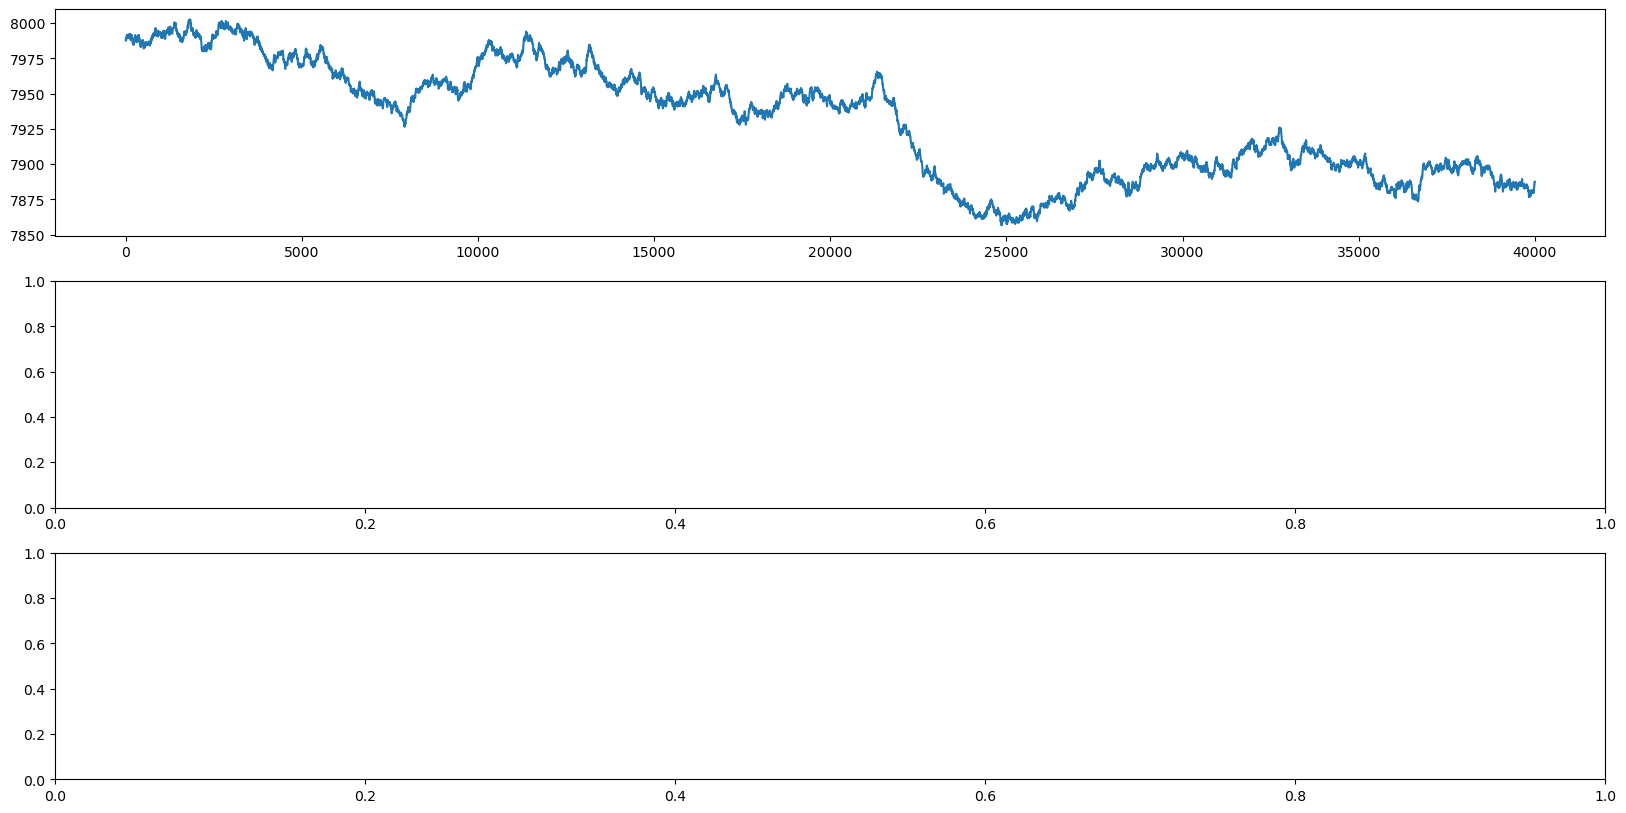

In [11]:
choco = temp_df[temp_df['product'] == 'CHOCOLATE']
straw = temp_df[temp_df['product'] == 'STRAWBERRIES']
roses = temp_df[temp_df['product'] == 'ROSES']

fig, axs = plt.subplots(3, 1, figsize=(20, 10))
axs[0].plot(choco["mid_price"], label="choco")
axs[0].suptitle('Chocolate')
axs[1].plot(straw["mid_price"], label="straw")
axs[1].suptitle('Strawberries')
axs[2].plot(roses["mid_price"], label="roses")
axs[2].suptitle('Roses')

In [112]:
synth_etf = pd.DataFrame(synth_etf)


In [113]:
product_t = str
price_t = int
quantity_t = int

def create_synth_book(books: Dict[product_t, List[Tuple[price_t, quantity_t]]], const: int = 400):
    synth_book = {}
    strawberries = books["STRAWBERRIES"]
    chocolate = books["CHOCOLATE"]
    roses = books["ROSES"]
    while (len(strawberries) != 0 and len(chocolate) != 0 and len(roses) != 0):

        min_qty = min(strawberries[0][1], chocolate[0][1], roses[0][1])
        lvl_price = 6*strawberries[0][0] + 4*chocolate[0][0] + roses[0][0] + const
        synth_book[lvl_price] = min_qty
        if strawberries[0][1] == min_qty:
            strawberries.pop(0)
        if chocolate[0][1] == min_qty:
            chocolate.pop(0)
        if roses[0][1] == min_qty:
            roses.pop(0)
    return synth_book

In [75]:
columns = []
columns.extend([f"ask_price_{i}" for i in range(1, 5)])
columns.extend([f"ask_volume_{i}" for i in range(1, 5)])
columns.extend([f"bid_price_{i}" for i in range(1, 5)])
columns.extend([f"bid_volume_{i}" for i in range(1, 5)])
synth_etf = pd.DataFrame(data = 0, columns=columns, index=prices_concat.groupby(["day", "timestamp"]).first().index)

for (day, timestamp), df in prices_concat.groupby(["day", "timestamp"]):

    straw = df[df["product"] == "STRAWBERRIES"].fillna(0)
    choco = df[df["product"] == "CHOCOLATE"].fillna(0)
    roses = df[df["product"] == "ROSES"].fillna(0)
    ask_books = {
        "STRAWBERRIES": 
            [
                (straw["ask_price_1"].values[0], straw["ask_volume_1"].values[0]),
                (straw["ask_price_2"].values[0], straw["ask_volume_2"].values[0]),
                (straw["ask_price_3"].values[0], straw["ask_volume_3"].values[0]),
            ],
        "CHOCOLATE":
            [
                (choco["ask_price_1"].values[0], choco["ask_volume_1"].values[0]),
                (choco["ask_price_2"].values[0], choco["ask_volume_2"].values[0]),
                (choco["ask_price_3"].values[0], choco["ask_volume_3"].values[0]),
            ],
        "ROSES":
            [
                (roses["ask_price_1"].values[0], roses["ask_volume_1"].values[0]),
                (roses["ask_price_2"].values[0], roses["ask_volume_2"].values[0]),
                (roses["ask_price_3"].values[0], roses["ask_volume_3"].values[0]),
            ]
    }
    bid_books = {
        "STRAWBERRIES":
            [
                (straw["bid_price_1"].values[0], straw["bid_volume_1"].values[0]),
                (straw["bid_price_2"].values[0], straw["bid_volume_2"].values[0]),
                (straw["bid_price_3"].values[0], straw["bid_volume_3"].values[0]),
            ],
        "CHOCOLATE":
            [
                (choco["bid_price_1"].values[0], choco["bid_volume_1"].values[0]),
                (choco["bid_price_2"].values[0], choco["bid_volume_2"].values[0]),
                (choco["bid_price_3"].values[0], choco["bid_volume_3"].values[0]),
            ],
        "ROSES":
            [
                (roses["bid_price_1"].values[0], roses["bid_volume_1"].values[0]),
                (roses["bid_price_2"].values[0], roses["bid_volume_2"].values[0]),
                (roses["bid_price_3"].values[0], roses["bid_volume_3"].values[0]),
            ]
    }
    ask_synth_book = create_synth_book(ask_books)
    bid_synth_book = create_synth_book(bid_books)
    
    for i, (price, volume) in enumerate(ask_synth_book.items()):
        synth_etf.loc[(day, timestamp), f"ask_price_{i+1}"] = price
        synth_etf.loc[(day, timestamp), f"ask_volume_{i+1}"] = volume
    for i, (price, volume) in enumerate(bid_synth_book.items()):
        synth_etf.loc[(day, timestamp), f"bid_price_{i+1}"] = price
        synth_etf.loc[(day, timestamp), f"bid_volume_{i+1}"] = volume

In [114]:
synth_etf

,0
0,71080.5
6,71078.5
10,71073.5
13,71075.5
17,71085.5
...,...
39982,70572.0
39985,70579.0
39989,70576.5
39992,70582.0


In [115]:
synth_etf_d0 = synth_etf.loc[DAY]
synth_etf_d0.reset_index(inplace=True)


KeyError: 1

In [116]:
gift_basket.reset_index(inplace=True)

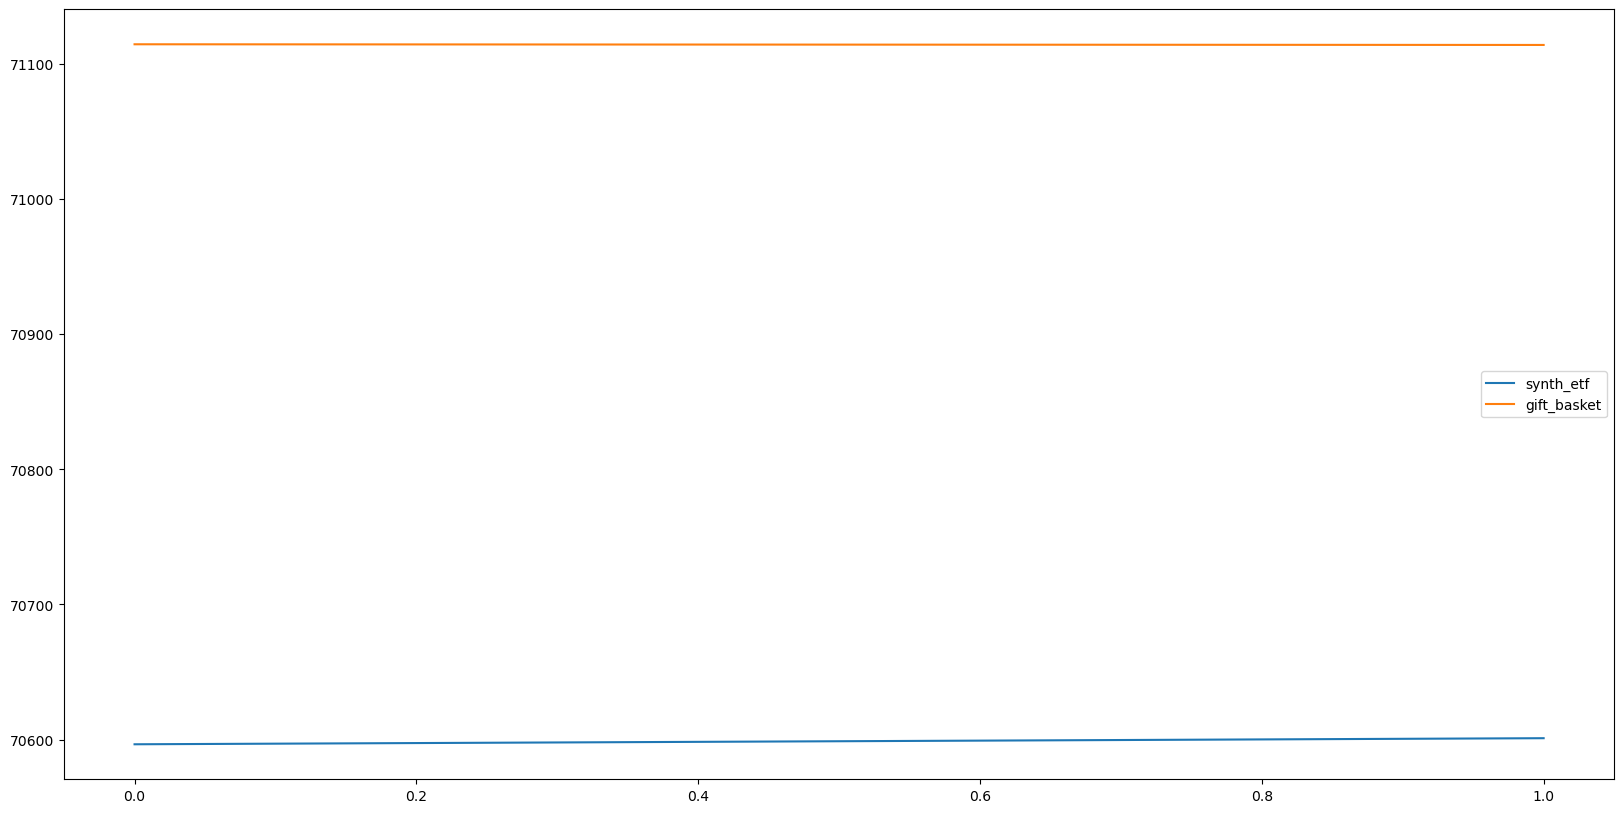

In [117]:
plt.figure(figsize=(20,10))
plt.plot(((synth_etf_d0["ask_price_1"] + synth_etf_d0["bid_price_1"])/2).iloc[:2], label="synth_etf")
plt.plot(gift_basket["mid_price"].iloc[:2], label="gift_basket")

plt.legend()

### Observing lvl 1 arbitrage 

In [85]:
# buy 1 synth at the ask price and sell 1 synth at the bid price
# arb if ask price < bid price

arb_mask_sell_basket = synth_etf_d0["ask_price_1"] < gift_basket["bid_price_1"]
#arb_mask_min_qty = np.min(synth_etf_d0["ask_volume_1"].loc[arb_mask_sell_basket], gift_basket["bid_volume_1"].loc[arb_mask_sell_basket])
arb_mask_buy_basket = synth_etf_d0["bid_price_1"] > gift_basket["ask_price_1"]

In [86]:
under_val_spread = pd.Series(np.where(arb_mask_buy_basket, synth_etf_d0["bid_price_1"] - gift_basket["ask_price_1"], 0))
over_val_spread = pd.Series(np.where(arb_mask_sell_basket, gift_basket["bid_price_1"] - synth_etf_d0["ask_price_1"], 0))

250 choco, 60 roses 60 gift, 350 strawberry

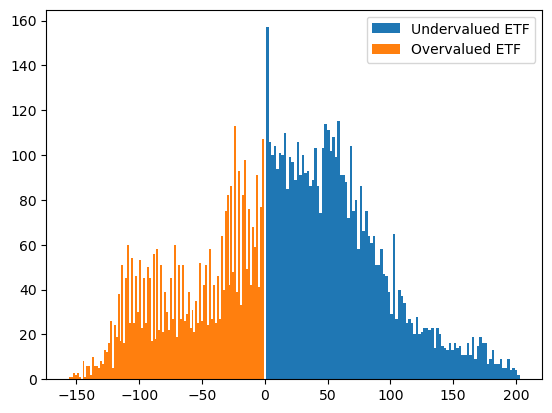

In [87]:
plt.hist(under_val_spread[under_val_spread!=0], bins=100, label="Undervalued ETF")
plt.hist(-over_val_spread[over_val_spread!=0], bins=100, label="Overvalued ETF")
plt.legend();

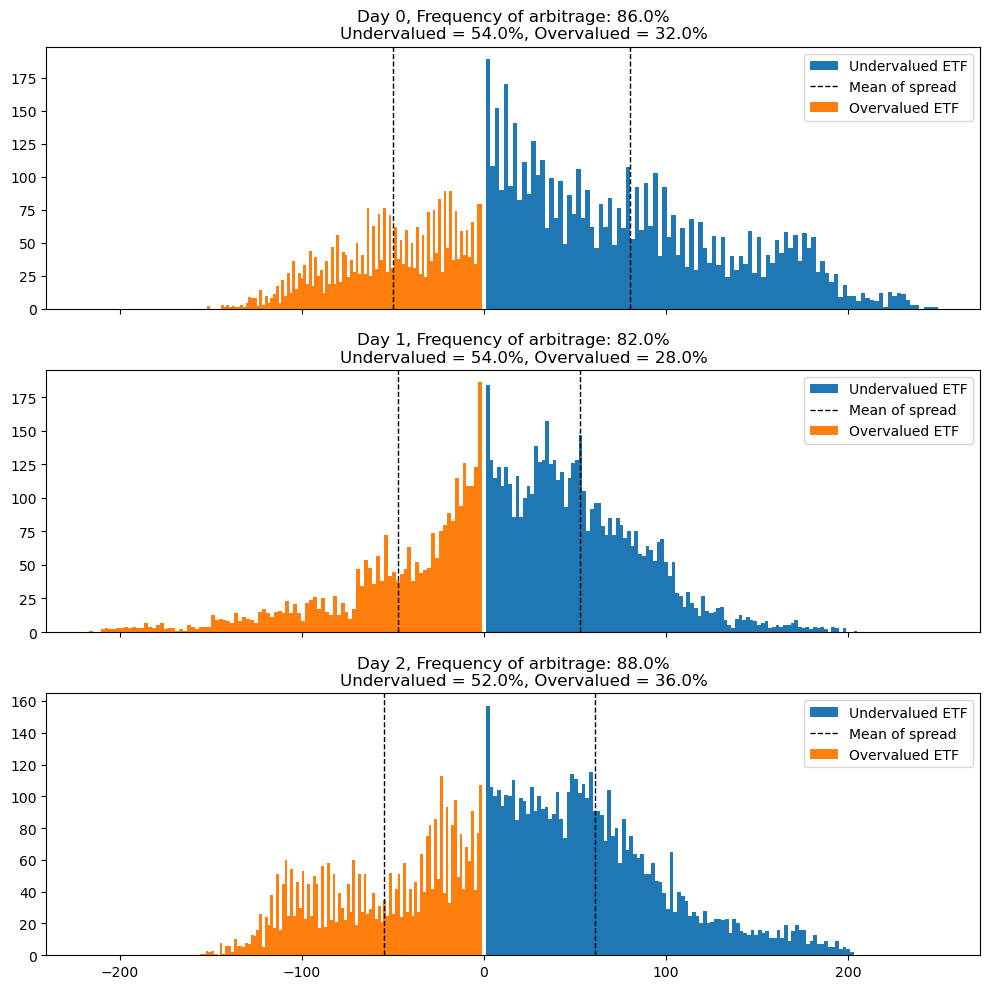

In [104]:
fig, axs = plt.subplots(3, 1, figsize=(10,10), sharex=True)
for day in range(0,3):
    synth_etf_d0 = synth_etf.loc[day]
    synth_etf_d0.reset_index(inplace=True)
    temp_df = prices[day]
    gift_basket = temp_df[temp_df['product'] == 'GIFT_BASKET']
    gift_basket.reset_index(inplace=True)

    arb_mask_sell_basket = synth_etf_d0["ask_price_1"] < gift_basket["bid_price_1"]
    arb_mask_buy_basket = synth_etf_d0["bid_price_1"] > gift_basket["ask_price_1"]

    under_val_spread = pd.Series(np.where(arb_mask_buy_basket, synth_etf_d0["bid_price_1"] - gift_basket["ask_price_1"], 0))
    over_val_spread = pd.Series(np.where(arb_mask_sell_basket, gift_basket["bid_price_1"] - synth_etf_d0["ask_price_1"], 0))

    axs[day].set_title(f"""Day {day}, Frequency of arbitrage: {round(100*np.sum(arb_mask_sell_basket | arb_mask_buy_basket) / len(arb_mask_sell_basket),0)}%
    Undervalued = {round(100*np.sum(arb_mask_buy_basket) / len(arb_mask_buy_basket),0)}%, Overvalued = {round(100*np.sum(arb_mask_sell_basket) / len(arb_mask_sell_basket),0)}%""")
    axs[day].hist(under_val_spread[under_val_spread!=0], bins=100, label="Undervalued ETF")
    #vertical line at mean of under_val_spread
    axs[day].axvline(under_val_spread[under_val_spread!=0].mean(), color='k', linestyle='dashed', linewidth=1, label="Mean of spread")
    axs[day].hist(-over_val_spread[over_val_spread!=0], bins=100, label="Overvalued ETF")
    #vertical line at mean of over_val_spread
    axs[day].axvline(-over_val_spread[over_val_spread!=0].mean(), color='k', linestyle='dashed', linewidth=1)
    axs[day].legend();

plt.tight_layout();




In [120]:
for prod in prices_concat["product"].unique():
    temp_df = prices_concat[prices_concat["product"] == prod]
    print(prod)
    print("Bid: ", temp_df["bid_volume_1"].min(), "\t Ask: " , temp_df["ask_volume_1"].min())
    


CHOCOLATE
Bid:  4 	 Ask:  4
STRAWBERRIES
Bid:  3 	 Ask:  3
ROSES
Bid:  3 	 Ask:  3
GIFT_BASKET
Bid:  1 	 Ask:  1


In [119]:
prices_concat[prices_concat["product"] == "CHOCOLATE"]["mid_price"]


31661.389

In [ ]:
prices_concat[prices_concat["product"] == "CHOCOLATE"]["mid_price"].mean()*4
